In [ ]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Dados de adversario enfretandos/nemeses/fregues

In [ ]:
base = sqlite3.connect("/content/drive/MyDrive/DataBase/twitchbotdb.db")
def banana():

    query = """
CREATE TEMP TABLE banana as SELECT * FROM(SELECT * FROM (SELECT tab1.id_set, tab1.round, tab1.id_player1,tab1.Jogador_1, tab1.score1, tab2.id_player2, tab2.Jogador_2, tab2.score2 FROM (SELECT Partidas.id_set, round, id_player1, gamertag as Jogador_1, score1 FROM Partidas LEFT JOIN Jogadores ON Jogadores.id=Partidas.id_player1) AS tab1
LEFT JOIN
(SELECT Partidas.id_set, round, id_player2, gamertag as Jogador_2, score2 FROM Partidas LEFT JOIN Jogadores ON Jogadores.id=Partidas.id_player2) AS tab2 ON tab2.id_set=tab1.id_set) as tab3)
"""
    return query


base.execute(banana())
df = pd.read_sql("SELECT * FROM banana", base, index_col="id_set")

# Numero de partidas

In [ ]:
df_s_dq = df[(df['score1'] != -1) & (df['score2'] != -1 )]

id_jogador = 244727
um_jogador_df = df_s_dq[(df_s_dq["id_player1"] == id_jogador) | (df_s_dq["id_player2"] == id_jogador)]
vitorias_um_jogador = um_jogador_df[(um_jogador_df["id_player1"] == id_jogador) & (um_jogador_df["score1"] > um_jogador_df["score2"]) | 
                                    (um_jogador_df["id_player2"] == id_jogador) & (um_jogador_df["score2"] > um_jogador_df["score1"])]
jogador_nome = um_jogador_df[um_jogador_df["id_player1"] == id_jogador]["Jogador_1"].iloc[0]

vitorias_um_jogador
vitorias_derrotas = [len(um_jogador_df), len(vitorias_um_jogador), len(um_jogador_df) - len(vitorias_um_jogador), 
                     round(len(vitorias_um_jogador)/len(um_jogador_df) *100, 2),  100 - round(len(vitorias_um_jogador)/len(um_jogador_df) *100, 2)]
vitorias_derrotas

[1133, 857, 276, 75.64, 24.36]

Text(0.5, 1.0, 'Vitorias e Derrotas DARK')

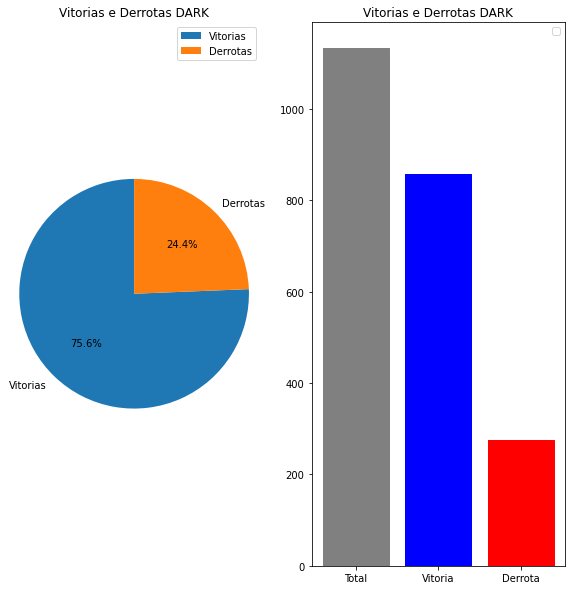

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10, 10), ncols=2)
ax1[0].pie(vitorias_derrotas[3:], autopct='%1.1f%%', labels=["Vitorias", "Derrotas"], 
        startangle=90)
ax1[1].bar(["Total", "Vitoria", "Derrota"], vitorias_derrotas[:3])
x = plt.bar(["Total", "Vitoria", "Derrota"], vitorias_derrotas[:3])
x[2].set_color('r')
x[1].set_color('b')
x[0].set_color('gray')

ax1[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1[0].legend()
ax1[1].legend()

ax1[0].set_title(f"Vitorias e Derrotas {jogador_nome}")
ax1[1].set_title(f"Vitorias e Derrotas {jogador_nome}")

# Outro dados

In [ ]:
# DArk 244727
id_jogador = 244727
df_s_dq = df[(df['score1'] != -1) & (df['score2'] != -1 )]

um_jogador_df = df_s_dq[(df_s_dq["id_player1"] == id_jogador) | (df_s_dq["id_player2"] == id_jogador)]
jogador_nome = um_jogador_df[um_jogador_df["id_player1"] == id_jogador]["Jogador_1"].iloc[0]

f = um_jogador_df["Jogador_1"].value_counts().drop(jogador_nome)
g = um_jogador_df["Jogador_2"].value_counts().drop(jogador_nome)


In [ ]:
for jogador in f.index:
  try:
    f[jogador] = f[jogador] + g[jogador]
  except:
    pass

total_partidas =pd.DataFrame(f)
total_partidas.index.name = "Jogadores"
total_partidas.columns = ["Total Partidas"]

In [ ]:
um_jogador_df = df[((df["id_player1"] == id_jogador) & (df["score1"]<df["score2"])) | ((df["id_player2"] == id_jogador) & (df["score2"]<df["score1"]))]
f = um_jogador_df["Jogador_1"].value_counts().drop(jogador_nome)
g = um_jogador_df["Jogador_2"].value_counts().drop(jogador_nome)
for jogador in f.index:
  try:
    f[jogador] = f[jogador] + g[jogador]
  except:
    break
total_enemies_wins = pd.DataFrame(f)
total_enemies_wins.index.name = "Jogadores"
total_enemies_wins.columns = ["Vitorias"]

In [ ]:

total_partidas["Vitorias"] = total_enemies_wins["Vitorias"]
total_partidas = total_partidas.fillna(0)
total_partidas["Derrotas"] = total_partidas["Total Partidas"] - total_partidas["Vitorias"]
total_partidas["% de Vitorias"] = round((total_partidas["Vitorias"]/total_partidas["Total Partidas"])*100, 2)
total_partidas

,Total Partidas,Vitorias,Derrotas,% de Vitorias
Jogadores,,,,
HorusPaulin,62,27.0,35.0,43.55
Jah_lexe,46,21.0,25.0,45.65
Gust,41,17.0,24.0,41.46
ChuChu,36,11.0,25.0,30.56
-DAVI-,45,15.0,30.0,33.33
...,...,...,...,...
Tatsunojutso,1,0.0,1.0,0.00
Seifer,1,0.0,1.0,0.00
silverio424,6,0.0,6.0,0.00


In [ ]:
t1 = total_partidas["Total Partidas"] >= total_partidas["Total Partidas"].mean()
t2 = total_partidas["% de Vitorias"] == total_partidas[t1].min().loc["% de Vitorias"]
fregueses = total_partidas[(t2) & (t1)]
fregues = fregueses[fregueses["Total Partidas"] == fregueses["Total Partidas"].max()]
fregues

,Total Partidas,Vitorias,Derrotas,% de Vitorias
Jogadores,,,,
JOE_OROCHI,18,0.0,18.0,0.0


In [ ]:
t1 = total_partidas["Total Partidas"] >= total_partidas["Total Partidas"].mean()
t2 = total_partidas["% de Vitorias"] == total_partidas[t1].max().loc["% de Vitorias"]
rivais = total_partidas[(t2) & (t1)]
nemeses = rivais[rivais["Total Partidas"] == rivais["Total Partidas"].max()]
nemeses

,Total Partidas,Vitorias,Derrotas,% de Vitorias
Jogadores,,,,
Carlos,7,5.0,2.0,71.43


In [ ]:
total_partidas.iloc[:]

,Total Partidas,Vitorias,Derrotas,% de Vitorias
Jogadores,,,,
HorusPaulin,62,27.0,35.0,43.55
Jah_lexe,46,21.0,25.0,45.65
Gust,41,17.0,24.0,41.46
ChuChu,36,11.0,25.0,30.56
-DAVI-,45,15.0,30.0,33.33
...,...,...,...,...
Tatsunojutso,1,0.0,1.0,0.00
Seifer,1,0.0,1.0,0.00
silverio424,6,0.0,6.0,0.00


In [ ]:
column_headers = total_partidas
row_headers = [x for x in total_partidas]

rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))
rcolors, ccolors

In [ ]:
r = np.array([[[25/100,10/100,25/100, .25] for p in range(5)] for x in range(10)] )



In [ ]:
tabela_df = total_partidas.reset_index()
fig, ax = plt.subplots(figsize=(11, 11))

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

ax.table(cellText=tabela_df.values[:10], colLabels=tabela_df.columns, loc='center', colColours=ccolors, cellColours=r)

fig.tight_layout()
fig.save(dpi=100)

# COLOCAÇÂO POR MÊS ⏬

In [ ]:
base = sqlite3.connect("/content/drive/MyDrive/DataBase/twitchbotdb.db")
def placement_event():

    query = """
CREATE TEMP TABLE placement_event as SELECT * FROM (SELECT *  FROM Placement
LEFT JOIN
Eventos
ON  Eventos.id=Placement.id_event)"""
    return query


base.execute(placement_event())
df = pd.read_sql("SELECT * FROM placement_event", base)

 ## GRAFICO COLOCAÇOES POR MES PONTINHOS

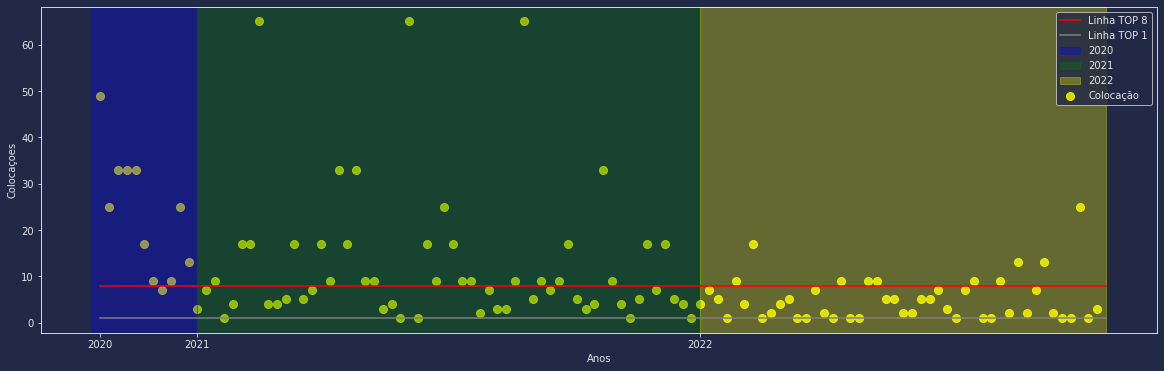

In [ ]:
df["data"] = pd.to_datetime(df['startAt'], unit="s")
jogador = 1207581
colors = ["blue", "green", "yellow"]


jogador_placement = df[df["id_user"] == jogador].sort_values(by=['data'])
jogador_placement.index = np.arange(len(jogador_placement))
jogador_placement['ConvertedDate']= jogador_placement["data"].astype(str)
jogador_placement['year'] = pd.DatetimeIndex(jogador_placement["data"]).year

fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(x=jogador_placement["ConvertedDate"], y=jogador_placement["placement"], s=65, label="Colocação", alpha=0.8, color="yellow")

plt.plot((0, len(jogador_placement["ConvertedDate"])), (8, 8), color="Red", label="Linha TOP 8")
plt.plot((0, len(jogador_placement["ConvertedDate"])), (1, 1), color="gray", label="Linha TOP 1")


ponts_xtick = []
x1 = -1
for x in range(len(jogador_placement["year"].unique())):
  label_ticktt = jogador_placement["year"].unique()[x]
  t = jogador_placement[jogador_placement["year"] == label_ticktt]["data"].min()
  ponts_xtick.append(jogador_placement[jogador_placement["data"] == t].index[0])

  
  if x+1 == len(jogador_placement["year"].unique()):
    max_x = len(jogador_placement["ConvertedDate"])
  else:
    t = jogador_placement[jogador_placement["year"] == jogador_placement["year"].unique()[x+1]]["data"].min()
    max_x = jogador_placement[jogador_placement["data"] == t].index[0]

  ax.axvspan(x1, max_x, alpha=0.3, label=str(label_ticktt), color=colors[x])
  x1 = max_x

ax.set_xticks(ponts_xtick)
ax.set_xticklabels(jogador_placement["year"].unique())

ax.legend()

ax.set_xlabel("Anos")
ax.set_ylabel("Colocaçoes")

plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
  plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
  plt.rcParams[param] = '#212946'  # bluish dark grey


## TESTE ADVER

In [ ]:
jogador_placement['year'].value_counts()

2021    85
2022    71
2020    33
Name: year, dtype: int64

In [ ]:
for x in range(len(jogador_placement["year"].unique()) - 1):  
  xtick_ += [len(jogador_placement[jogador_placement["year"].isin([jogador_placement["year"].unique()[x]])])]
xtick_

In [ ]:
ponts  = [len(jogador_placement[jogador_placement["year"].isin([jogador_placement["year"].unique()[x]])]) for x in range(len(jogador_placement["year"].unique()) - 1)]
ponts.insert(0, 0)
ponts

[0, 33, 85]

In [ ]:
ponts_xtick = []
for x in jogador_placement["year"].unique():
  t = jogador_placement[jogador_placement["year"] == x]["data"].min()
  ponts_xtick.append(jogador_placement[jogador_placement["data"] == t].index[0])
ponts_xtick


[0, 33, 118]

(0.0, 2.0)

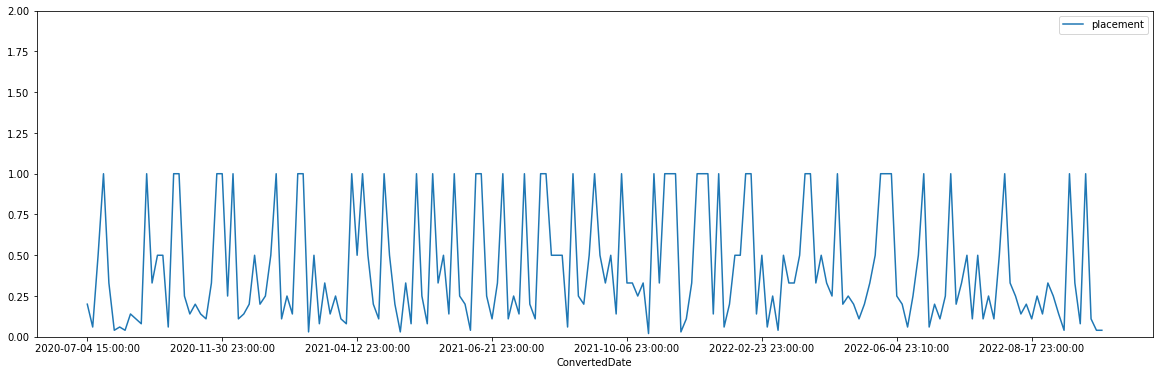

In [ ]:
df["data"] = pd.to_datetime(df['startAt'], unit="s")
jogador = 244727

jogador_placement = df[df["id_user"] == jogador].sort_values(by=['data'])
jogador_placement['ConvertedDate']= jogador_placement["data"].astype(str)
jogador_placement["placement"] = round((1/jogador_placement["placement"]), 2)
fig, ax = plt.subplots(figsize=(20, 6))
jogador_placement[["placement", "ConvertedDate"]].plot(x="ConvertedDate", ax=ax)
#plt.plot("data", "placement", data=jogador_placement)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d-%h-%M'))
lab =  [str(b) for b in jogador_placement["ConvertedDate"]]

ax.set_ylim(0,2)
#ax.set_xticks([x for x in range(0, len(jogador_placement["ConvertedDate"]))])
#ax.set_xticklabels([2019, 2020, 2021, 2022])
#ax.xticks(range(90), range(1,91))



In [ ]:
df["data"] = pd.to_datetime(df['startAt'], unit="s")
jogador = 244727

jogador_placement = df[df["id_user"] == jogador].sort_values(by=['data'])
jogador_placement['month'] = pd.DatetimeIndex(jogador_placement["data"]).month
jogador_placement['year'] = pd.DatetimeIndex(jogador_placement["data"]).year
total_per_month = (jogador_placement.groupby(['year','month','placement']))['placement'].count().unstack()
total_per_month.fillna(0)

In [ ]:
df["data"] = pd.to_datetime(df['startAt'], unit="s")
jogador = 244727

jogador_placement = df[df["id_user"] == jogador].sort_values(by=['data'])
jogador_placement['month'] = pd.DatetimeIndex(jogador_placement["data"]).month
jogador_placement['year'] = pd.DatetimeIndex(jogador_placement["data"]).year
more_8 = jogador_placement[jogador_placement["placement"] > 8]["placement"].unique()
more_4_less_8 = jogador_placement[(jogador_placement["placement"] <= 8) & (jogador_placement["placement"] > 3)]["placement"].unique()
more_1_less_2 = jogador_placement[(jogador_placement["placement"] <= 3) & (jogador_placement["placement"] > 1)]["placement"].unique()
replace_dic = {">8":more_8, "4 a 8":more_4_less_8, "2 a 3":more_1_less_2}
for replaces in replace_dic.keys():
  jogador_placement["placement"] = jogador_placement["placement"].replace(replace_dic[replaces], replaces)
total_per_month = (jogador_placement.groupby(['year','placement','month']))['placement'].count().unstack()
total_per_month = total_per_month.fillna(0)
total_per_month.columns = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

label = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
color = ["blue", "red", "yellow"]


x = np.arange(len(label))  # the label locations

width = 0.15  # the width of the bars
print(x - width/2)
print(x + width/2)
fig, ax = plt.subplots(dpi=100, figsize=(20, 12))
#for x_ in range(len(total_per_month[total_per_month.index.get_level_values('placement') == 1])):
 # total_per_month.iloc[x_].plot(marker='o', legend=True, ax=ax)
rects1 = ax.bar(x - width, total_per_month[total_per_month.index.get_level_values('placement') == 1].iloc[0], width,label="2020")
rects2 = ax.bar(x , total_per_month[total_per_month.index.get_level_values('placement') == 1].iloc[1], width,label="2021")
rects3 = ax.bar(x + width, total_per_month[total_per_month.index.get_level_values('placement') == 1].iloc[2], width,label="2022")
  #total_per_month[total_per_month.index.get_level_values('placement') == 1].iloc[x_].plot(kind="bar", legend=True, ax=ax, color=color[x_])
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks([x for x in range(0, 13)])
ax.legend()
ax.set_xticklabels(label)
ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)
#ax.bar_label(rects3, padding=3)



plt.show()

# GRAFICO MEDIA DE COLOCAÇOES POR MÊS UM JOGADOR

In [ ]:
df["data"] = pd.to_datetime(df['startAt'], unit="s")
jogador = 244727

jogador_placement = df[df["id_user"] == jogador].sort_values(by=['data'])
jogador_placement['month'] = pd.DatetimeIndex(jogador_placement["data"]).month
jogador_placement['year'] = pd.DatetimeIndex(jogador_placement["data"]).year

total_per_month = (jogador_placement.groupby(['year','month']))['placement'].mean().unstack()

total_per_month.columns = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
total_per_month = total_per_month.fillna(0)
total_per_month

,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
year,,,,,,,,,,,,
2020,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,7.666667,13.000000,5.600000,5.000000,4.714286,4.714286
2021,4.0,4.000000,9.000000,4.444444,4.625000,6.625000,3.750000,5.166667,2.833333,9.142857,7.285714,2.200000
2022,8.0,4.857143,4.666667,4.500000,1.666667,5.777778,4.555556,5.333333,7.375000,0.000000,0.000000,0.000000


In [ ]:
df["data"] = pd.to_datetime(df['startAt'], unit="s")
jogador = 244727

jogador_placement = df[df["id_user"] == jogador].sort_values(by=['data'])
jogador_placement['month'] = pd.DatetimeIndex(jogador_placement["data"]).month
jogador_placement['year'] = pd.DatetimeIndex(jogador_placement["data"]).year

total_per_month = (jogador_placement.groupby(['year','month']))['placement'].mean().unstack()

total_per_month.columns = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

total_per_month = 1/total_per_month
fig, ax = plt.subplots(dpi=100, figsize=(20, 12))

for x in range(len(total_per_month)):
  total_per_month.iloc[x].plot(marker='o', legend=True, ax=ax)
ax.set_xticks([x for x in range(0, 13)])
ax.set_xticklabels(total_per_month.columns)


# Partidas dois jogadores e seus eventos

In [ ]:
base = sqlite3.connect("/content/drive/MyDrive/DataBase/twitchbotdb.db")
partidas = pd.read_sql("SELECT * FROM Partidas", base)
eventos = pd.read_sql("SELECT * FROM Eventos", base)

NameError: ignored

In [ ]:
jogador1 = 244727
jogador2 = 1163020
def banana():

    query = """
CREATE TEMP TABLE banana as SELECT * FROM(SELECT * FROM (SELECT tab1.id_set, tab1.id_event, tab1.round, tab1.id_player1,tab1.Jogador_1, tab1.score1, tab2.id_player2, tab2.Jogador_2, tab2.score2 FROM (SELECT Partidas.id_set, id_event, round, id_player1, gamertag as Jogador_1, score1 FROM Partidas LEFT JOIN Jogadores ON Jogadores.id=Partidas.id_player1) AS tab1
LEFT JOIN
(SELECT Partidas.id_set, round, id_player2, gamertag as Jogador_2, score2 FROM Partidas LEFT JOIN Jogadores ON Jogadores.id=Partidas.id_player2) AS tab2 ON tab2.id_set=tab1.id_set) as tab3)
"""
    return query


def partidas_eventos():

  query = """
CREATE TEMP TABLE partidas_eventos as SELECT * FROM (SELECT * FROM banana
LEFT JOIN
Eventos
on Eventos.id==banana.id_event)
"""
  return query

base.execute(banana())
base.execute(partidas_eventos())


In [ ]:
df2 = pd.read_sql("SELECT * FROM partidas_eventos", base)
df2["data"] = pd.to_datetime(df2['startAt'], unit="s")
df2['data2']= df2["data"].astype(str)
df2 = df2[(df2["id_player1"] == jogador1) & (df2["id_player2"] == jogador2) | (df2["id_player2"] == jogador1) & (df2["id_player1"] == jogador2)]

player_one_wins = df2[(df2["id_player1"] == jogador1) & (df2["id_player2"] == jogador2)  & (df2["score1"] > df2["score2"]) 
| (df2["id_player2"] == jogador1) & (df2["id_player1"] == jogador2) & (df2["score1"] < df2["score2"])]
player_two_wins = df2[(df2["id_player1"] == jogador1) & (df2["id_player2"] == jogador2)  & (df2["score1"] < df2["score2"]) 
| (df2["id_player2"] == jogador1) & (df2["id_player1"] == jogador2) & (df2["score1"] > df2["score2"])]

partida_events_two_ply = df2[["data", "round", "Jogador_1", "score1", "Jogador_2", "score2", "slug", "name"]].sort_values(by=["data"])

In [ ]:
player_one_wins['winner'] = 1
player_two_wins['winner'] = 2


In [ ]:
f = player_one_wins["data"].value_counts() > 1
for datas in f.index[f == True]:
  id_set = player_one_wins[player_one_wins["data"] == datas].iloc[0]["id_set"]
  
  player_one_wins.loc[player_one_wins["id_set"] == id_set, "winner"] = 0.75

f = player_two_wins["data"].value_counts() > 1
for datas in f.index[f == True]:
  id_set = player_two_wins[player_two_wins["data"] == datas].iloc[0]["id_set"]
  
  player_two_wins.loc[player_two_wins["id_set"] == id_set, "winner"] = 2.25
wins_division = player_one_wins.append(player_two_wins)
wins_division = wins_division.sort_values(by=["data"])
  


In [ ]:
player_one_wins

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(x=wins_division["data2"], y=wins_division["winner"], s=65, label="DARK", alpha=0.8, color="yellow")
#ax.scatter(x=player_one_wins["data2"], y=player_one_wins["winner"], s=65, label="Ronaldinho", alpha=0.8, color="blue")

ax.set_yticks([0, 1, 2, 3])
ax.set_xticks([0, 1, 2, 3])
ax.legend()


plt.style.use("dark_background")

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
  plt.rcParams[param] = '0.9'  # very light grey

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
  plt.rcParams[param] = '#212946'  # bluish dark grey

In [ ]:
partida_events_two_ply

In [ ]:
sets = df2[(df2["id_player1"] == jogador1) & (df2["id_player2"] == jogador2) | (df2["id_player2"] == jogador1) & (df2["id_player1"] == jogador2)]['id_set']
list_events = partidas[partidas['id_set'].isin(sets)]['id_event']
eventos[eventos['id'].isin(list_events)]


In [ ]:
df[(df["id_user"] == 1163020) & (df["placement"] == 1)]
df